<a href="https://colab.research.google.com/github/YuelianLi/Math-152/blob/main/Group_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Walk Visualization and Analysis

##Authored by: Bingrui Yan, Eric Huang, Hadar Goldstein, Yuelian Li, Zhicheng Guo

###Introduction

In this project our team used the python tool numpy to create calculations for a "Random walk" scenario and then used the matplotlib and PIL libraries to visualize the calculations. Our first step was to simply create a random walk and see what it looked like, and from there see what aspects of the walk seemed like they were worth diving deeper into. 

We ran random walks in one and two dimensions in two different ways. First we had a variable for a Person which represented their position and we looped the amount of steps and changed the position every loop. This method got the job done efficently but we only knew the starting and ending position, and could not make any assertions about what happened on the walk itself. 
After that our method became to make a numpy array of all zeros and then whichever way we decided to step, we increment that index by one. That way we could look at the array and see how many times each index had been visited, and analyze factors about the walk.

The way our person takes steps differes in different applications. Our simplest one is simply to pick one of four directions (up, down, left, right) randomly and then move the person that way. Our most complicated one was to pick an angle theta randomly for the person to face and have them take a step at that angle. 

In the following paper you will see our models and the results that we found about different aspects of the random walk, followed by a conclusion which summarises our data.

###Code:

First, all of our imports, make sure to run these so the rest of the code blocks run

In [ ]:
import numpy as np

In [ ]:
import random, math

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from PIL import Image

#####Random Walk Model Final Position Analysis

First, we use a for loop to explain how a person will have a random work for 1000 times in one and two dimention.

In [ ]:
# 1 dimension
N = 10000000 #times of flpping coins


way = random.randint(0,1) #the result of flipping coin is either 0(head)or 1(tail)
person = 0 #the original position of walking
for i in range(N): #every time
    way = random.randint(0, 1) #start to flip coins
    if way == 0: #if the coin is on the head(positive)
        person += 1 #move to the right for 1 unit
    if way == 1: #if the coin is on the tail(negative)
        person += -1 #move to the left for 1 unit

print('final position is:', person) #after flpping 10000 times, where is the person now

print(math.sqrt(N),abs(person)) # confirming the expected value, maybe do a graph? sqrt(N) vs 'person'.

final position is: -3508
3162.2776601683795 3508


In [ ]:
# question 1, two dimensions 
# instead of a random direction (NSEW) pick a random vector (a random direction on the unit circle)
# <cos theta, sin theta> for a random in (0,2*pi)

N = 10000 #times of possing four-side dice

person_x = 0 #original position of X axis is 0
person_y = 0 #original position of Y axis is 0
for i in range(N): #every time
    way = random.randint(0, 3) #start to poss four-side dice with 0,1,2,3 in each side
    if way == 0: #if the result of possing the four-side dice is 0
        person_x += 1 #move to the right towards X axis for 1 unit
    if way == 1: #if the result of possing the four-side dice is 1
        person_x += -1 #move to the left towards X axis for 1 unit
    if way == 2: #if the result of possing the four-side dice is 2
        person_y += 1 #move to the up towards Y axis for 1 unit
    if way == 3: #if the result of possing the four-side dice is 3
        person_y += -1 #move to the down towards Y axis for 1 unit

print('final position is:(%d,%d)'%(person_x,person_y)) ##after possing 10000 times, the final position of this person is

final position is:(-78,74)


Next, we show route under function image. We decided to make a graph for the route of one arbigrary test when walking 1000 times in one-dimention. We want to see what happened or is there any certain pattern after walking a specific times, so that we made such graph.

In [ ]:


for j in range (20,1000,300): 

  pos = np.zeros((1,2)) #initialize 

#the final position, the whole walk, ... distance, ...
#will save the data in an array later


  for i in range(j):
   theta =  random.random()*2*math.pi
   vector = np.array([np.cos(theta),np.sin(theta)]) #this is one step of the random walk. this is not the partial position.
   pos += vector #this is just the final position. Not saving all the steps. Not saving all the partial position

   pos

  list_1 = np.zeros((2,j)) 
  #create an array, plot the first dimension as x and the second as y 
  for i in range(j):
    theta =  random.random()*2*math.pi
    vector = np.array([np.cos(theta),np.sin(theta)]) #this is one step of the random walk. this is not the partial position.
    pos += vector #this is just the final position. Not saving all the steps. Not saving all the partial position
  #dis= math.sqrt(np.cos(theta)**2+np.sin(theta)**2)
    list_1[:,i] = pos
   
    
print(list_1)

[[ 19.56506478  19.72400911  19.10591501 ...  12.75703958  13.01516541
   13.78389964]
 [-22.05617106 -21.06888351 -20.2827794  ... -16.92961802 -17.89572932
  -17.25616095]]


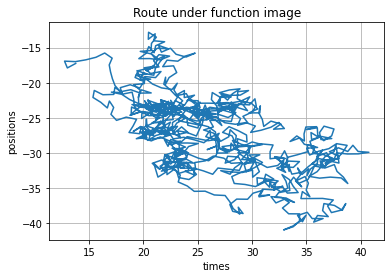

In [ ]:
  %matplotlib inline
  plt.plot(list_1[0,],list_1[1,]) 
  plt.title('Route under function image')
  plt.ylabel('positions')
  plt.xlabel('times') 
  plt.grid(True)  
  plt.show()#the last walk  

From this graph we can conclude that there is no certain patten for a random walk, But by flipping a coin, the area covered by a person's route will not be too far from the starting point.

Meanwhile, we discuss about the final position for 1000 participants who walk for 1000 times per test. We create this histogram in order to see the posibility of final position.

In [ ]:
N = 10000
steps = np.random.choice([-1,1], N)
final_pos = steps.sum()
print('Your final position is:', final_pos)

Your final position is: -90


In [ ]:
num_steps = 1000
num_trials = 1000
steps = np.random.choice([-1,1], (num_steps, num_trials))
final_pos = steps.sum(axis=0)

In [ ]:
p = 0
x_values = list(range(1,1001))
y_values = []
for i in range(1000):
  p = p + steps[1,i]
  y_values.append(p)

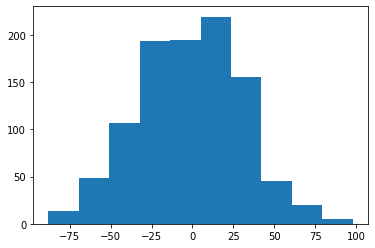

In [ ]:
plt.hist(final_pos)
plt.show()

Finally, we draw the graph is about the first trail that he walks for 1000 times in 2-dimension.

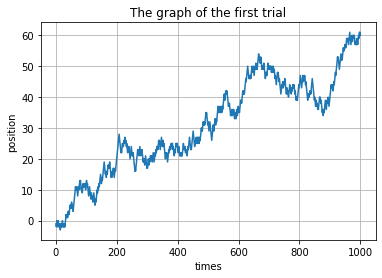

In [ ]:
%matplotlib inline
plt.plot(x_values, y_values)
plt.title('The graph of the first trial')
plt.ylabel('position')
plt.xlabel('times')
plt.grid(True)
plt.show()

The graph is about the first trail that they walk for 1000 times. The whole 
distance is the 1000, while the displacement at each position is the absolute value between each position and y=0. We can conclude that for random walk in 2 dimentions without a wall, although the route is random, actually one is sure to turn around into an inverse direction frequently instead of walk forward to a terminal of either direction.

#####Random Walk Square Root Law Analysis

At this point we asked ourselves if their would be a way to calculate where the final position would be. Looking at the graphs we also got curious about the farthest point from the origin that the person reached which we will call max distance.

First we declare the variables we will need.

In [ ]:
len_array = 1000 #make an array of zeroes of size 10,000
mid = len_array//2 #we will start in the middle of the array
arry = np.zeros((len_array, len_array))
pos = [mid, mid] #set starting position to the middle 
          
spreads = []  #in this array we will store the maximum distances at every walk. at this point we were calling them spreads
final_positions = [] #here we will store the final position of every walk

Now we are going to run the loops for our tests

In [ ]:
for N in range(0,100):  #run 100 loops
  max_distance = 0
  for i in range(0,N): #run loops, in every loop we increase the amount of steps
    way = np.random.randint(0, 4) #pick a random direction, 0: left 1: right 2: up 3: down
    if(way == 0): #set all possibilites
      pos[0] -= 1
    elif(way == 1):
      pos[0] += 1
    elif(way == 2):
      pos[1] += 1
    elif(way == 3):
      pos[1] -= 1
    arry[pos[0],pos[1]] += 1 #increment the index you are standing on by 1
    distance = math.sqrt( (mid - pos[0])**2 + (mid - pos[1])**2 ) #distance between two points formula
    if (distance > max_distance): #check if our current spot is the farthest we've ever been. if it is set it to max distance
      max_distance = distance

  final_pos = math.sqrt( (mid - pos[0])**2 + (mid - pos[1])**2 ) #calculate the straight line distance of the final position to the starting point
  final_positions.append(final_pos) #add to list of final positions
  spreads.append(max_distance) #add max distance to list of spreads

  arry = np.zeros((len_array, len_array)) #reset array for next run
  pos = [mid, mid] #reset starting position for next turn


Now we have all of our data in arrays, lets take a look.

It might be interesting to ask how many times the final position is actually the maximum distance. Here is the code for that.

In [ ]:
times_final_position_equals_max_distance = 0

for i in range(0,100):
  if(final_positions[i] == spreads[i]):
    times_final_position_equals_max_distance += 1

print("out of 100, the final posoiton equaled the max distance {} times".format(times_final_position_equals_max_distance))

out of 100, the final posoiton equaled the max distance 28 times


Interestingly the two numbers are equal more often than we initially expected. This might be something interesting to explore, but not in this paper.

Now we will graph our results to analyze the visualizations. Supposedly there should be a correlation between these values and the square root of the amount of steps taken. Let's see if that is true. We will graph our max distance against the square root and also the final position and see which one has the better correlation.

Text(0.5, 1.0, 'Final position graph on top of $\\sqrt{x}$ ')

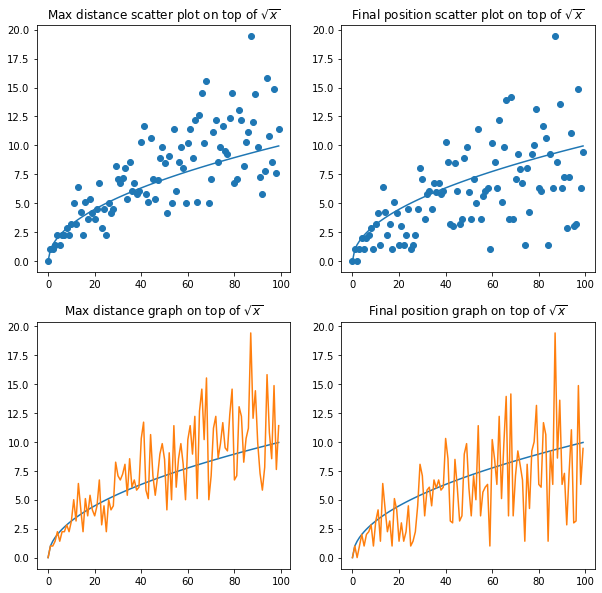

In [ ]:
x = np.linspace(0,99,100)
y_sqrt = [math.sqrt(n) for n in x]

fig, axs = plt.subplots(2, 2, figsize=(10,10))


axs[0, 0].plot(x, y_sqrt)
axs[0, 0].scatter(x,spreads)
axs[0, 0].set_title("Max distance scatter plot on top of $\sqrt{x}$ ")

axs[1, 0].plot(x, y_sqrt)
axs[1, 0].plot(x,spreads)
axs[1, 0].set_title("Max distance graph on top of $\sqrt{x}$ ")


axs[0, 1].plot(x, y_sqrt)
axs[0, 1].scatter(x,final_positions)
axs[0, 1].set_title("Final position scatter plot on top of $\sqrt{x}$ ")


axs[1, 1].plot(x, y_sqrt)
axs[1, 1].plot(x,final_positions)
axs[1, 1].set_title("Final position graph on top of $\sqrt{x}$ ")


We have the same graph represented as both a scatter plot, and then below as a function.


It looks like early on there is a solid correlation between maximum distance and the square root that fades out as the number of loops grows, but the correlation somewhat sticks.

With final position the correlation is much weaker so much so that we'd say the maximum distance has a much better correlation with the square root than the final position

We think that maybe if we increase the degrees of freedom the correlation will improve. For example instead of traveling either north, east, south, or west, If we could pick between N, NE, E, SW, S, SE, W, NW, then maybe the correlation would increase, but we will not be exploring that theory further in this paper.

##### Visualizing random walks on different surfaces

The random walks investigated in the previous parts were all random walks in the Cartesian plane. One might be interested in the behavior of a random walk on a different surface; for example, studying random walks on the surface of a sphere could be useful in modelling random movement across large areas of the Earth. For example, the migratory patterns of certain species, while not random, could share some properties with a random walk. 

Below, we visualize a random walk on a Klein bottle. For ease of computation and visualization, instead of viewing this surface as being embedded in $\mathbb{R}^4$, or some other ambient higher dimensional space, we work with a plane model for the Klein bottle, by identifying the edges of a square in a certain manner. We then perform a standard random walk in a 2 dimensional box, with specific rules for the behavior at the edges. The path taken in the random walk is then drawn, with the darker pixels being the locations visited most often. We can see that drawing the random walk in the plane model reveals how the edges are identified to form the Klein bottle.

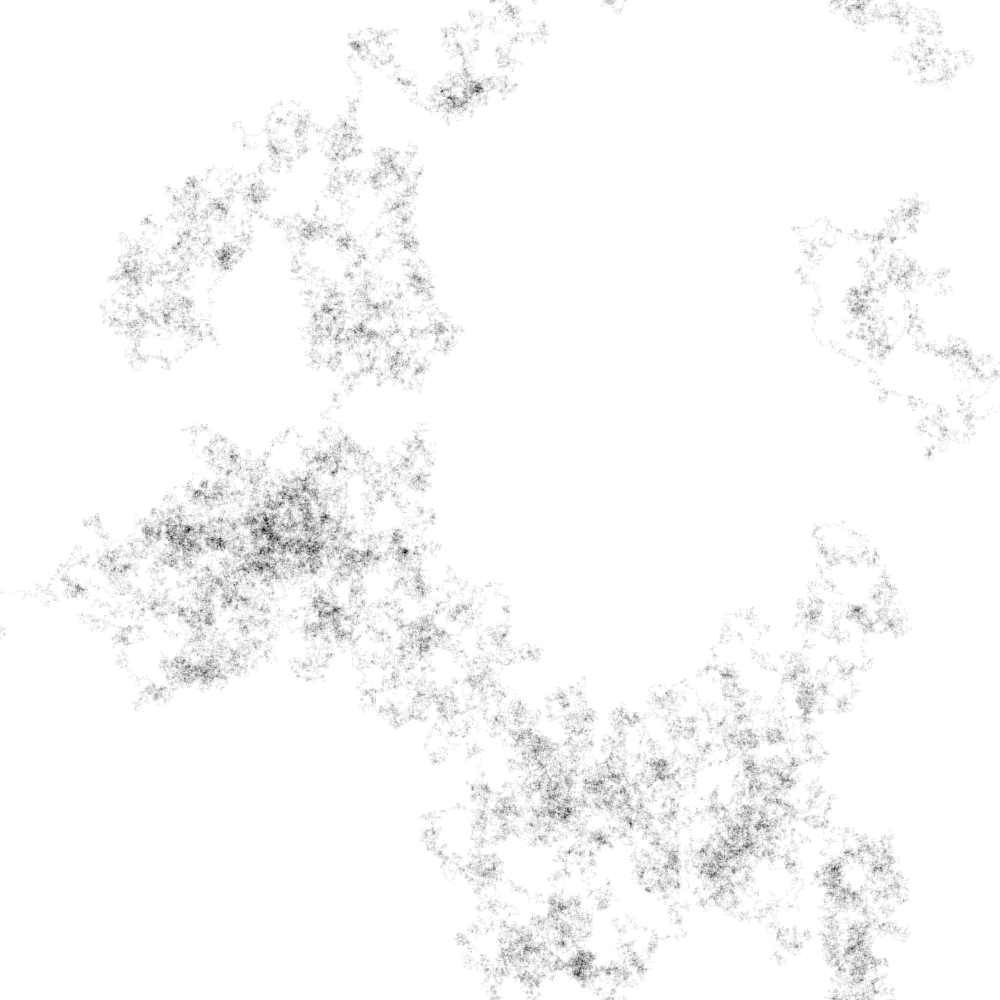

In [ ]:
size = 1000 #Our image will end up being 1000 by 1000 pixels
steps = 1000000 #Our random walk will be 1 million steps long
klein = np.zeros((size, size)) #Initialize our array of visited locations on the Klein bottle
pos = [0,size//2] #Initialize our starting position on the edge of the square
for i in range(steps):
  klein[pos[0],pos[1]] += 1 
  direction = np.random.randint(0,4)
  if direction == 0:
    pos[0] = (pos[0] + 1) % size
  if direction == 1:
    pos[0] = (pos[0] - 1) % size #This glues the left and right edges together, without a twise
  if direction == 2:
    if pos[1] == size-1:
      pos[1] = 0
      pos[0] = size - 1 - pos[0] #This glues the top and bottom edges together with a twist, forming the Klein bottle.
    else:
      pos[1] = (pos[1] + 1)
  if direction == 3:
    if pos[1] == 0:
      pos[1] = size - 1
      pos[0] = size - 1 - pos[0]
    else:
      pos[1] = (pos[1] - 1)
max = np.max(klein)
image = np.zeros([size, size, 3], dtype=np.uint8)
for x in range(size):
  for y in range(size):
    image[x,y] = [255 - klein[x,y]*255/max]*3 #Make the squares visited more often darker.
img = Image.fromarray(image)
display(img)

###Conclusion


What we learned about random walks is first and foremost that they are random. When we saw that the graph of the final positions formed a normal distribution, that was very reassuring. According tot he central limit theorem any truly random set of events would unfold in such a way as to be characterised by a normal distribution. The fact that when we graphed the final positions of a series of random walks it ended up in a normal distribution assured us that these walks must truly be random.

This randomness was not helpful however when we attempted to find a formula to calculate the maximum distance travelled from the starting position or possibly the final position. We found there to be somewhat of a correlation between the maximum distance travlled and the square root of the number of steps taken, and an even weaker correlation between the final position and the square root of the steps. Ultimately we felt the randomness got in the way of being able to accurately caculate either maximum distance or final position within a reasonable margin of certainty.

After that we were awestruck by the images produced of a random walk on a non cartesian plane such as a klein bottle. The image truly showed us that a random walk on a different surface is just as random as a walk on any other surface, and reassured us of the randomness aspect of our research.

From this project we learned a lot about randomness, distributions, and correlations. Random walks are useful in calculations of gas diffusion and also shortest path finding algorithims. We feel lucky to have been able to dive deeply into a topic with so many unexpect applications.

Thank you for taking the time to read our paper and analyze our studies.
